![](https://upload.wikimedia.org/wikipedia/en/b/bb/Titanic_breaks_in_half.jpg)

# Project 1: [Titanic](https://www.kaggle.com/c/titanic/data)
---

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this project, you will exercise your skills with loading data, python data structures, and Pandas to identify charactaristics of Titanic survivors!

---
#### Your goals should be to:
* Practice python programming including loops, conditionals, types, functions, and data structures
* Start thinking critically about manipulating, organizing, and interpreting data
* Troubleshoot errors

---
#### Getting Started:
* **fork** the repository on git.generalassemb.ly
* **clone** your forked repo

---
#### Submission:
* You should be working on a **fork** of the GA project one repository. 
* Use **git** to manage versions of your project. Make sure to `add`, `commit`, and `push` your changes to **your fork** of the github 
* Submit a link to your project repository in the submission form by **Friday, 9/29 11:59 PM**. You will then receive the solutions.
* Create a copy of your original notebook (file > make a copy in jupyter notebook)
* In the copy, use the solutions to correct your work. Make sure to take note of your successes and struggles. Did you learn anything new from correcting your work?
* Submit the corrected version by **Sunday, 10/1 11:59 PM** to receive instructor feedback on your work. ***Projects submitted after this deadline will not receive instructor feedback.***

### Considerations:

* You will be generating long data strutures- avoid displaying the whole thing. Display just the first or last few entries and look at the length or shape to check whether your code gives you back what you want and expect.
* Make functions whenever possiblle!
* Be explicit with your naming. You may forget what `this_list` is, but you will have an idea of what `passenger_fare_list` is. Variable naming will help you in the long run!
* Don't forget about tab autocomplete!
* Use markdown cells to document your planning, thoughts, and results. 
* Delete cells you will not include in your final submission
* Try to solve your own problems using this framework:
  1. Check your spelling
  2. Google your errors. Is it on stackoverflow?
  3. Ask your classmates
  4. Ask a TA or instructor
* Do not include errors or stack traces (fix them!)

# 1. Using the `with open()` method in the `csv` library, load the titanic dataset into a list of lists.

* The `type()` of your dataset should be `list`
* The `type()` of each element in your dataset should also be `list`
* The `len()` of your dataset should be 892 (892 rows, including the header)
* The `len()` of each row element in your dataset should be have a `len()` of 12
* Print out the first 3 rows including the header to check your data.

In [251]:
import csv
from IPython.display import display
import numpy as np

In [252]:
# load titanic.csv in to a list of lists using csv.reader() and with open()
with open('titanic.csv') as titanic: 
    csv = csv.reader(titanic)
    titanic_list = list(csv)

display(titanic_list[0:3])

[['PassengerId',
  'Survived',
  'Pclass',
  'Name',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked'],
 ['1',
  '0',
  '3',
  'Braund, Mr. Owen Harris',
  'male',
  '22',
  '1',
  '0',
  'A/5 21171',
  '7.25',
  '',
  'S'],
 ['2',
  '1',
  '1',
  'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
  'female',
  '38',
  '1',
  '0',
  'PC 17599',
  '71.2833',
  'C85',
  'C']]

# 2. Separate the first header row from the rest of your dataset. 

* The header should be a list of the column names
* The data should be the rest of your data
* Display the header and the first row of the dataset zipped together using `zip`
* Your result should look like...


```
[('PassengerId', '1'),
 ('Survived', '0'),
 ('Pclass', '3'),
 ...
 ('Embarked', 'S')]
 ```

In [253]:
# set header as the list of column names, data as the rest of the data. Zip these together to create tuples and display the first passenger's data (ID = 1) and the zipped header contents
header = titanic_list[0]
data = titanic_list[1:]
first_zip = zip(header, data[0])

display(list(first_zip))

[('PassengerId', '1'),
 ('Survived', '0'),
 ('Pclass', '3'),
 ('Name', 'Braund, Mr. Owen Harris'),
 ('Sex', 'male'),
 ('Age', '22'),
 ('SibSp', '1'),
 ('Parch', '0'),
 ('Ticket', 'A/5 21171'),
 ('Fare', '7.25'),
 ('Cabin', ''),
 ('Embarked', 'S')]

# 3. Using a `for` loop, load your data into a `dict` called `data_dict`.

* The keys of your `data_dict` should be `PassengerId`
* The values of your `data_dict` should be dictionaries...
  * Each of these dictionaries should reperesent a column value within a row
  * The keys should be the names of the columns
  * The values should be the values of that column
  
The beginning of your `data_dict` should look like: 

    {'1': {'Age': '22',
      'Cabin': '',
      'Embarked': 'S',
      'Fare': '7.25',
      'Name': 'Braund, Mr. Owen Harris',
      'Parch': '0',
      'Pclass': '3',
      'Sex': 'male',
      'SibSp': '1',
      'Survived': '0',
      'Ticket': 'A/5 21171'},
     '10': {'Age': '14',
      'Cabin': '',
      'Embarked': 'C',
      'Fare': '30.0708',
      'Name': 'Nasser, Mrs. Nicholas (Adele Achem)',
      'Parch': '0',
      'Pclass': '2',
      'Sex': 'female',
      'SibSp': '1',
      'Survived': '1',
      'Ticket': '237736'},
      ...
      }

In [344]:
# create a data dictionary with the first key:value pair as the key = PassengerId and the value = another data dictionary. Inside this second dictionary, the key:value pairs are the key = column name ('Age', 'SibSp', etc.) and the value is the value associated with that passenger in that column 
data_dict = {}
for j in data:
    for a, b in zip(header ,j):
        if a == 'PassengerId':
            c = b
            data_dict[c] = {}
        else:
            data_dict[c].update({a:b})
    
# only displaying one passenger's dictionary so that there is not too much output
display(data_dict['1'])

{'Age': '22',
 'Cabin': '',
 'Embarked': 'S',
 'Fare': '7.25',
 'Name': 'Braund, Mr. Owen Harris',
 'Parch': '0',
 'Pclass': '3',
 'Sex': 'male',
 'SibSp': '1',
 'Survived': '0',
 'Ticket': 'A/5 21171'}

# 4. Repeat step 3 using a dictionary comprehension.

* Using `==`, check if your `data_dict` from your `for` loop is the same as the one from your dictionary comprehension.

In [432]:
# tried to create a dictionary comprehension. For some reason, it outputs two nested dictionaries with the PassengerId as a key for the first two. If the 'j[0] term is deleted from the line 'data_dict_comp[j[0]] = .....' then the output is correct, however it is only the last passenger (ID = 891)

data_dict_comp = {}

for j in data:
    dict_comprehension = {a:b for a, b in zip(header, j) if a != 'PassengerId'}
    data_dict_comp[j[0]] = {b:dict_comprehension for a, b in zip(header, j) if a =='PassengerId'}
    
display(data_dict_comp['1'])

{'1': {'Age': '22',
  'Cabin': '',
  'Embarked': 'S',
  'Fare': '7.25',
  'Name': 'Braund, Mr. Owen Harris',
  'Parch': '0',
  'Pclass': '3',
  'Sex': 'male',
  'SibSp': '1',
  'Survived': '0',
  'Ticket': 'A/5 21171'}}

In [ ]:
 {b: for a, b in zip(header, j) if a == 'PassengerId'}

# 5. Transform your `data_dict` to be oriented by column and call it `data_dict_columns`

* Currently, our `data_dict` is oriented by row, indexed by `"PassengerId"`. 
* Transform your data so that the title of each row is a key, the values are of type `list` and represent column vectors.

If you display `data_dict_columns`, the beginning should look like...

    {'Age': ['25',
      '36',
      '24',
      '40',
      '45',
      '2',
      '24',
      '28',
      '33',
      '26',
      '39',
      ...

In [256]:
# oriented the dictionary as follows: key:value pairs are key = column name ('Age', 'SibSp', etc.) and value = list of all data for that specific column 

from collections import defaultdict

data_dict_columns = defaultdict(list)
for j in data_dict:
    for a in data_dict[j]:
        data_dict_columns[a].append(data_dict[j][a])
# only displaying the first 25 data points of the 'Age' column to conserve space
display(data_dict_columns['Age'][0:25])

['22',
 '38',
 '26',
 '35',
 '35',
 '',
 '54',
 '2',
 '27',
 '14',
 '4',
 '58',
 '20',
 '39',
 '14',
 '55',
 '2',
 '',
 '31',
 '',
 '35',
 '34',
 '15',
 '28',
 '8']

# 6. Data Types

What is the current `type` of each column? What do you think the data type of each column *should* be? The data types in Python are...

* `int`
* `float`
* `str`
* `bool`
* `tuple`
* `list`
* `dict`
* `set`

In a markdown cell, describe what each column represents and what the `type` of each value should be. **Extra:** If you want to be fancy, use a [markdown table](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables) to display your results.

PassengerId - Represents an assigned PassengerId numbered 1 through 892. This should be an integer.

Survived - If the corresponding passenger survived, Survived = 1. If they did not survive, Survived = 0. This should also be an integer.

PClass - The socioeconomic class that the passenger belonged to, upper class = 1, middle class = 2, lower class = 3. This should also be represented by an integer.

Name - The name and title of the passenger. This should be represented by a string.

Sex - The sex of the passenger. This should be represented by a string.

Age - The age of the passenger. This should be represented by a float since some of the ages are entered as decimals.

SibSp - This column represents the number of siblings and/or spouses aboard the Titanic with the corresponding passenger. This should be represented by an integer.

Parch - Represents the number of parents and/or children aboard the Titanic with the corresponding passenger. This should also be represented by an integer.

Ticket - The ticket number of the passenger's ticket. Although called a ticket number, this should be represented as a string since the ticket numbers include both letters and numbers.

Fare - Amount of money the passenger spent on their ticket aboard the Titanic. Should be represented as a float object.

Cabin - The cabin number where the passenger was staying aboard the Titanic. The cabin number includes both letters and numbers and, therefore, should be represented as a string.

Embarked - The port that the passenger embarked from. This is represented as a single upper-case letter, therefore, should be represented as a string.

# 7. Transform each column to the appropriate type if needed.

Build a function called `transform_column` that takes arguments for a `data_dict`, `column_name`, and `datatype`, and use it to transofm the columns that need transformation.

**NOTE:** There are values in this dataset that cannot be directly cast to a numerical value. Use `if/then` or `try/except` statements to handle errors. 

**To help identify potential sources of errors, explore the `set` of values in each column.**

In [257]:
# create a function that takes a data dictionary (in this case data_dict_columns is the default), the column name and the datatype that the column should be changed to
def transform_column(column_name, datatype, data_dict = data_dict_columns):
    new_data_dict = {}
    
    # loop through the dictionary until you find the correct column name
    for j in data_dict:
        if j == column_name:
            new_data_dict[j] = []
            
            # using the column name, loop through all data in that specific column
            for a in data_dict[j]:
                
                # try to change the datatype to the type set in the function
                try:
                    if a == '':
                        pass
                    else:
                        new_data_dict[j].append(datatype(a))
                        
                # if the datatype cannot be converted to the type specified, then just append the original data and move to the next one        
                except:
                    new_data_dict[j].append(a)
                
    # loop through this newly made data dictionary
    for l in new_data_dict:
        
        # once the column name is found that we are operating on, replace the column name in the actual dictionary with our newly created dictionary
        if l == column_name:
            data_dict[l] = new_data_dict[l]
    return data_dict

# these are all of the function calls in order to convert the columns to the correct datatypes
transform_column('Survived', int)
transform_column('Age', float)
transform_column('SibSp', int)
transform_column('Parch', int)
transform_column('Pclass', int)
transform_column('Fare', float)

# added the following so that there is no output printed. The output was really long and took up a ton of space.
space_function = []

# 8. Build functions to calculate the mean, sample standard deviation, and median of a list of ints or floats. Use `scipy.stats.mode` or build your own mode function!


If you filled any missing values with `np.NaN`, you may need to handle that in your functions (look up `np.isnan()`).

If building a `mode` function is too difficult, you import mode from `scipy.stats` using `from scipy.stats import mode`.

**Optional:**  Build a function for calculating the Mode that returns the mode value *and* the count of that value. Mode is tricky, so start by building a function that counts the occurances of each value. You may also need to sort using a `key` with a `lambda function` inside. You may also find a `defaultdict` useful.

Mean

In [258]:
# create a function that finds the mean of a given list

def this_mean(data_list):
    
    # initialize variables
    total = 0
    mean = 0
    new_data_list = []
    
    # loop through the data list
    for length in range(len(data_list)):
        
        # if the data is an empty string, pass and continue on to the next data point
        if data_list[length] == '':
            pass
        
        # if the data is not an empty string, append it to the new data list
        else:
            new_data_list.append(data_list[length])
            
    # loop through the new data list and add up all of the values
    for length in range(len(new_data_list)):
        total += new_data_list[length]
        
    # return the total of all of the values added up divided by the total number of values (the average)
    return total/len(new_data_list)

Standard Deviation

In [259]:
# create a function that finds the standard deviation of a given list

def this_std(data_list):
    
    # if we are working with the Fare list or the Age list, the list should be represented in floats
    if data_list == data_dict_columns['Fare'] or data_list == data_dict_columns['Age']:
        transform_column(data_list, float)
        
    # if we are not working with the Fare or the Age list, it should be represented as an int
    else:
        transform_column(data_list, int)
        
    # initialize variables  
    deviation_value = 0
    standard_deviation = 0
    length_of_list = len(data_list)
    
    # loop through the data list
    for length in range(len(data_list)):
        
        # if the list contains an empty string, the length of the list is one data point shorter than previously thought
        if data_list[length] =='':
            length_of_list -= 1
            
        # if it is not an empty string, add all points together for the (mean of the data - that particular data point) squared
        else:
            deviation_value += ((this_mean(data_list) - data_list[length]) ** 2)
            
    # this is the standard deviation equation
    standard_deviation = np.sqrt(deviation_value/(length_of_list))
    return standard_deviation

Median

In [260]:
# create a function to find the median of the data list

def this_median(data_list):
    
    # sort the data list in order from lowest to highest
    new_data_list = sorted(data_list)
    
    # return the value that is at the midpoint of the data list
    return new_data_list[round(len(new_data_list)/2)]

Mode

In [261]:
# initial attempt at creating a mode function, Age and SibSp kept throwing errors so I restarted (below)

# def this_mode(data_list):
#    count = []
#    for j in range(len(data_list)):
#        incrementer = 0
#        for i in range(len(data_list)):
#            if data_list[j] == data_list[i]:
#                incrementer += 1
#                count.append(incrementer)
#            else:
#                pass
#    actual_count = 0
#    keep = 0
#    for u in range(len(count)):
#        if count[u] > actual_count:
#            actual_count = count[u]
#            keep = u
#    return data_list[keep], actual_count
# this_mode(data_dict_columns['Parch'])

In [262]:
# create a function that finds the mode of a given data list

def this_mode(data_list):
    
    # initialize variables
    our_dict = {}
    final_counter = 0
    keep = 0
    
    # loop through the contents of the list
    for i in data_list:
        counter = 0
        
        # create another loop through the contents of the list. When the outer loop equals the inner loop, add 1 to the counter. Otherwise, pass on to the next data point
        for j in data_list:
            if i == j:
                counter += 1
            else:
                pass
            
        # create a dictionary with key:value pairs key = data and value = number of times that data appears in the list
        our_dict[i] = counter
        
    # loop through the newly created dictionary
    for j in our_dict:
        this_counter = our_dict[j]
        
        # if the current data has a higher count than any previous data, then assign this new value to the keep variable and the count of this to the final counter. The loop will continue to loop through and will end up with the highest counter and the value corresponding to that counter
        if this_counter > final_counter:
            keep = j
            final_counter = this_counter
        else:
            final_counter = final_counter
    
    # return the tuple (data, count of data)
    return keep, final_counter  

# 9. Summary Statistics of Numerical Columns

For numerical columns, what is the mean, standard deviation, mean, and mode for that data? Which measure of central tendency is the most descriptive of each column? Why? Explain your answer in a markdown cell.

In [263]:
display("The mean age aboard the Titanic was {} years old".format(this_mean(data_dict_columns['Age'])))
display("The standard deviation of age aboard the Titanic was {} years".format(this_std(data_dict_columns['Age'])))
display("The median age aboard the Titanic was {} years old".format(this_median(data_dict_columns['Age'])))
display("The mode age aboard the Titanic was {} years old which appeared {} times".format(this_mode(data_dict_columns['Age'])[0], this_mode(data_dict_columns['Age'])[1]))
print('\n')
display("The survival rate aboard the Titanic was {}".format(this_mean(data_dict_columns['Survived'])))
display("The standard deviation of the survival rate aboard the Titanic was {}".format(this_std(data_dict_columns['Survived'])))
display("The median survival (1 or 0) aboard the Titanic was {}".format(this_median(data_dict_columns['Survived'])))
display("The mode survival (1 or 0) aboard the Titanic was {} which appeared {} times".format(this_mode(data_dict_columns['Survived'])[0], this_mode(data_dict_columns['Survived'])[1]))
print('\n')
display("The mean socioeconomic class aboard the Titanic was {}".format(this_mean(data_dict_columns['Pclass'])))
display("The standard deviation of socioeconomic class aboard the Titanic was {}".format(this_std(data_dict_columns['Pclass'])))
display("The median socioeconomic class aboard the Titanic was {}".format(this_median(data_dict_columns['Pclass'])))
display("The mode socioeconomic class aboard the Titanic was {} which appeared {} times".format(this_mode(data_dict_columns['Pclass'])[0], this_mode(data_dict_columns['Pclass'])[1]))
print('\n')
display("The mean number of siblings and/or spouses that each passenger had aboard the Titanic was {}".format(this_mean(data_dict_columns['SibSp'])))
display("The standard deviation of number of siblings and/or spouses aboard the Titanic was {}".format(this_std(data_dict_columns['SibSp'])))
display("The median number of siblings and/or spouses aboard the Titanic for each passenger was {}".format(this_median(data_dict_columns['SibSp'])))
display("The mode number of siblings and/or spouses aboard the Titanic for each passenger was {} which appeared {} times".format(this_mode(data_dict_columns['SibSp'])[0], this_mode(data_dict_columns['SibSp'])[1]))
print('\n')
display("The mean number of parents and/or children that each passenger had aboard the Titanic was {}".format(this_mean(data_dict_columns['Parch'])))
display("The standard deviation of parents and/or children that each passenger had aboard the Titanic was {}".format(this_std(data_dict_columns['Parch'])))
display("The median number of parents and/or children aboard the Titanic for each passenger was {}".format(this_median(data_dict_columns['Parch'])))
display("The mode number of parents and/or children aboard the Titanic for each passenger was {} which appeared {} times".format(this_mode(data_dict_columns['Parch'])[0], this_mode(data_dict_columns['Parch'])[1]))
print('\n')
display("The mean ticket fare was ${}".format(this_mean(data_dict_columns['Fare'])))
display("The standard deviation of ticket fare was ${}".format(this_std(data_dict_columns['Fare'])))
display("The median ticket fare was ${}".format(this_median(data_dict_columns['Fare'])))
display("The mode ticket fare was ${} which appeared {} times".format(this_mode(data_dict_columns['Fare'])[0], this_mode(data_dict_columns['Fare'])[1]))







'The mean age aboard the Titanic was 29.69911764705882 years old'

'The standard deviation of age aboard the Titanic was 14.516321150817317 years'

'The median age aboard the Titanic was 28.0 years old'

'The mode age aboard the Titanic was 24.0 years old which appeared 30 times'

'The survival rate aboard the Titanic was 0.3838383838383838'

'The standard deviation of the survival rate aboard the Titanic was 0.48631931786710086'

'The median survival (1 or 0) aboard the Titanic was 0'

'The mode survival (1 or 0) aboard the Titanic was 0 which appeared 549 times'

'The mean socioeconomic class aboard the Titanic was 2.308641975308642'

'The standard deviation of socioeconomic class aboard the Titanic was 0.8356019334795189'

'The median socioeconomic class aboard the Titanic was 3'

'The mode socioeconomic class aboard the Titanic was 3 which appeared 491 times'

'The mean number of siblings and/or spouses that each passenger had aboard the Titanic was 0.5230078563411896'

'The standard deviation of number of siblings and/or spouses aboard the Titanic was 1.1021244350892836'

'The median number of siblings and/or spouses aboard the Titanic for each passenger was 0'

'The mode number of siblings and/or spouses aboard the Titanic for each passenger was 0 which appeared 608 times'

'The mean number of parents and/or children that each passenger had aboard the Titanic was 0.38159371492704824'

'The standard deviation of parents and/or children that each passenger had aboard the Titanic was 0.8056047612452284'

'The median number of parents and/or children aboard the Titanic for each passenger was 0'

'The mode number of parents and/or children aboard the Titanic for each passenger was 0 which appeared 678 times'

'The mean ticket fare was $32.2042079685746'

'The standard deviation of ticket fare was $49.66553444477411'

'The median ticket fare was $14.4542'

'The mode ticket fare was $8.05 which appeared 43 times'

Age: All four of the measures of central tendency are good descriptors for this data set. I think the average is the most useful, however they can all be used and interpretted.

Survived: The survival rate (mean) and the mode survival are the most useful. Knowing the total number of data points in this set, using either the mean survival rate or the mode survival, you can determine the measure of central tendency. The mean survival rate gives the odds that a randomly selected passenger survived the sinking of the ship.

Pclass: The most useful measure for Pclass is the mode Pclass since this shows that the majority of the passengers aboard the titanic were lower class.

SibSp: The mode number of siblings/spouses aboard the Titanic is the most descriptive for this set, since it shows that more passengers did not have any siblings or spouses on board than did have sibling(s) and/or spouse(s).

Parch: The mode number of parents/children aboard the Titanic is the most descriptive for this set, since it shows that more passengers did not have any parents or children on board than did have parent(s) and/or child(ren).

Fare: The standard deviation of the ticket fare is the most useful here, because it shows that ticket prices varied by a lot, even more than the average ticket price. It is also worth noting that the median ticket price is far lower than the mean ticket price, therefore raising concerns about outliers with very high ticket prices.

# 10. Splitting the Data to Predicting Survival

For all the passengers in the dataset, the mean survival rate is around .38 (38% of the passengers survived). From our data, we may be able to profile who survived and who didn't!

Split the data by pclass. Does the class a passenger was in affect survivability? You can do this by:
* Creating a list of `True` and `False` values conditional on a column's value
* Taking the mean of the `Survived` column where those values are `True`

In [264]:
# initialize variables
pclass1_survived = 0
pclass1_incrementer = 0
pclass2_survived = 0
pclass2_incrementer = 0
pclass3_survived = 0
pclass3_incrementer = 0

# loop through the Pclass data
for r in range(len(data_dict_columns['Pclass'])):
    
    # if the passenger was in Pclass1, increment the corresponding counter
    if data_dict_columns['Pclass'][r] == 1:
        pclass1_incrementer += 1
        
        # if the passenger in Pclass1 survived, increment the pclass1_survived counter
        if data_dict_columns['Survived'][r] == 1:
            pclass1_survived += 1
            
    # if the passenger was in Pclass2, increment the corresponding counter
    if data_dict_columns['Pclass'][r] == 2:
        pclass2_incrementer += 1
        
        # if the passenger in Pclass2 survived, increment the pclass2_survived counter
        if data_dict_columns['Survived'][r] == 1:
            pclass2_survived += 1
            
    # if the passenger was in Pclass3, increment the corresponding counter
    if data_dict_columns['Pclass'][r] == 3:
        pclass3_incrementer += 1
        
        # if the passenger in Pclass3 survived, increment the pclass3_survived counter
        if data_dict_columns['Survived'][r] == 1:
            pclass3_survived += 1

# divide the number of people who survived from each pclass by the number in the pclass to determine the survival rate for each pclass
pclass1_survival_rate = pclass1_survived/pclass1_incrementer
pclass2_survival_rate = pclass2_survived/pclass2_incrementer
pclass3_survival_rate = pclass3_survived/pclass3_incrementer
        
display("The survival rate for the upper class was {}".format(pclass1_survival_rate))
display("The survival rate for the middle class was {}".format(pclass2_survival_rate))
display("The survival rate for the lower class was {}".format(pclass3_survival_rate))

'The survival rate for the upper class was 0.6296296296296297'

'The survival rate for the middle class was 0.47282608695652173'

'The survival rate for the lower class was 0.24236252545824846'

# 11. Independent Work

Use the techniques from step 10 to make different conditional splits in the `Survived` column. Can you find a combination of splits that maximizes the survival rate?

In [265]:
# initialize variables
high_class_female_survived = 0
high_class_female_incrementer = 0

# loop through the Sex column of the dictionary
for r in range(len(data_dict_columns['Sex'])):
    
    # if the passenger is both a female and a member of pclass1 (upper class) then increment the corresponding counter
    if data_dict_columns['Sex'][r] == 'female' and data_dict_columns['Pclass'][r] == 1:
        high_class_female_incrementer += 1
        
        # if the high class female passenger survived, increment the survived counter
        if data_dict_columns['Survived'][r] == 1:
            high_class_female_survived += 1

# divide the number of high class females who survived by the total number of high class females aboard the Titanic to get the survival rate
high_class_female_survival_rate = high_class_female_survived/high_class_female_incrementer

display("The survival rate for high class females was {}".format(high_class_female_survival_rate))

'The survival rate for high class females was 0.9680851063829787'

# 12. Distributions

### A) For each of your numeric features, use `pyplot` subplots to plot a hisogram for each feature.

* Make sure to title each subplot.
* If you get an error, it may be caused by `np.NaN`

In [266]:
import matplotlib.pyplot as plt
%matplotlib inline

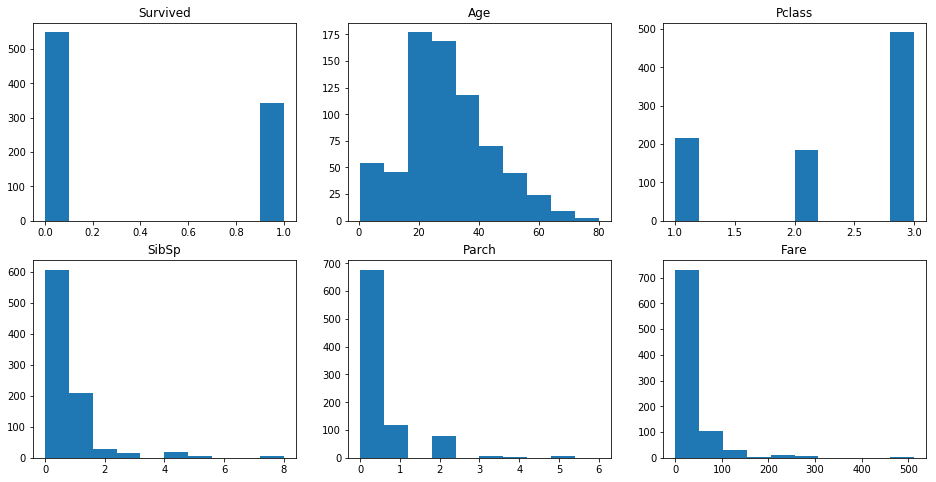

In [267]:
# using a for loop, loops through each data set and plots a histogram
numeric_columns = ['Survived', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']
fig = plt.figure(figsize=(16,8))
for i, col in enumerate(numeric_columns):
    fig.add_subplot(2,3,1+i)
    col_data = data_dict_columns[col]
    plt.hist(col_data)
    plt.title(col)

### B) for each of these values, what's the 90% confidence interval of the population mean?

* Create a function to find the confidence interval, and use it on each of the numeric columns.
* What's your interpretation of the interval?

In [268]:
from scipy import stats

In [269]:
# get_sample_means creates a list of means using a random "sampling" of the data and repeating this random sampling many times. Each iteration, the mean is added to a list of means. This is normally distributed. We can then obtain confidence intervals for the means of the data sets by determining the tails of the graph and where to "cutoff" each tail for the given confidence interval



# define a function that determines the sample means for a given distribution
def get_sample_means(distribution, sample_size = 300, num_samples = 300, replace = False):
    sample_means = []
    
    # loops through the samples and creates a list of means for each iteration of the function
    for _ in range(num_samples):
        this_mean = np.random.choice(distribution, size=sample_size, replace=replace).mean()
        sample_means.append(this_mean)
    return sample_means

# define a function that determines the confidence interval 
def confidence_interval_mean(distribution, confidence, sample_size = 300, num_samples = 300):
    
    # gets a list of means for samples and distribution passed into initial function
    means = get_sample_means(distribution, sample_size = sample_size, num_samples = num_samples)
    
    # gives distance from edges (0 or 100 percentile) that we are looking for for a given confidence interval
    dist_from_0_or_100 = (100-confidence)/2
    lower_percentile, upper_percentile = 0+dist_from_0_or_100, 100-dist_from_0_or_100
    
    # returns the lower and upper percentile of the means list created using the get_sample_means function
    return (np.percentile(means, lower_percentile), np.percentile(means, upper_percentile))

# loops through the data columns
for col in numeric_columns:
    
    # finds the lower and upper confidence intervals for the means of the given data set using the functions created above
    lower, upper = confidence_interval_mean(data_dict_columns[col], 90)
    display('We can be 90% confident that the mean for {} lies between {} and {}'
          .format(col, round(lower,2), round(upper,2)))

'We can be 90% confident that the mean for Survived lies between 0.35 and 0.42'

'We can be 90% confident that the mean for Age lies between 28.82 and 30.69'

'We can be 90% confident that the mean for Pclass lies between 2.25 and 2.37'

'We can be 90% confident that the mean for SibSp lies between 0.44 and 0.6'

'We can be 90% confident that the mean for Parch lies between 0.31 and 0.44'

'We can be 90% confident that the mean for Fare lies between 28.49 and 35.71'

These confidence intervals give a range of 90% confidence of where the mean of the datasets lie. This means that we can be 90% confident that the mean of our data set lies within these numbers.

# 13. Pandas

### A: Load the titanic csv into a `DataFrame` using `pd.read_csv()`

In [270]:
import pandas as pd

In [271]:
# load in as pandas dataframe
titanic_df = pd.read_csv('titanic.csv')

### B: Display the first 5 rows, the last 4 rows, and a sample of 3 rows.

In [272]:
# display the first 5 rows
display(titanic_df.head(5))

# display the last 4 rows
display(titanic_df.tail(4))

# sample 3 random rows
display(titanic_df.sample(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S


### C: Create a row mask that is `True` when `Pclass == 3`. Use this to mask your `DataFrame`. Find the mean of the `Survived` column. Is it the same as what we calculated in part 10?

In [273]:
# create a row mask for when Pclass = 3
pclass3_mask = titanic_df['Pclass'] == 3

# use the mask to return only those rows of passengers in Pclass3
titanic_df_pclass3 = titanic_df.loc[pclass3_mask]

# Add up the number of survivors in Pclass3
pclass3_survivors = titanic_df_pclass3['Survived'].sum()

# divide the number of survivors by the total number of Pclass3 members
display(pclass3_survivors/491)
display("This is the same survival rate we got in part 10 of this lab. 119 survivors of 491 total passengers belonging to Pclass 3 (low class)")

0.24236252545824846

'This is the same survival rate we got in part 10 of this lab. 119 survivors of 491 total passengers belonging to Pclass 3 (low class)'

### D: Using a `.groupby()`, what is the mean of the survival column grouped by `Pclass` and `Sex`. What are your observations?

In [274]:
# display a table with sex and pclass and their corresponding survival rates
display(titanic_df.groupby(['Sex', 'Pclass'])['Survived'].mean())

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

The higher class passengers were more likely to have survived the sinking of the Titanic than the lower class passengers. However, a low class female was still more likely to have survived than a high class male, therefore gender is more of a determining factor than class, however there is a strong correlation between class and survival.

### E: Survival Rate by Age Range:  `pd.cut()` takes two arguments: A `list`, `Series`, or `array`, and a list of bins. Create a new column in your `DataFrame` using `pd.cut()` that groups your ages into bins of 5 years. Then, use `.groupby()` to display the survival rate and count for each age group

In [275]:
# create a new_age variable with bins for the age group of every 5 years
new_age = pd.cut(titanic_df['Age'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

# use this new variable to display the survival rate of each age bin
display(titanic_df.groupby(new_age)['Survived'].mean())

Age
(0, 5]      0.704545
(5, 10]     0.350000
(10, 15]    0.578947
(15, 20]    0.343750
(20, 25]    0.344262
(25, 30]    0.388889
(30, 35]    0.465909
(35, 40]    0.417910
(40, 45]    0.361702
(45, 50]    0.410256
(50, 55]    0.416667
(55, 60]    0.388889
(60, 65]    0.285714
(65, 70]    0.000000
(70, 75]    0.000000
(75, 80]    1.000000
Name: Survived, dtype: float64

# 14. Hypothesis Testing

### A) Hypothesis:

Create a null and alternate hypothesis to ask the following quesiton: Was the `Age` of survivors different from that of people who didn't survive?

**Hypotheses:**

$H_0$: The age of those who did survive was the same, on average, as the age of those who did not survive.

$H_1$: The age of those who did survive was different, on average, from the age of those who did not survive.

### B) T-Testing

Use a t-test to test your null hypothesis. What's the p-value? What's your interpretation? Do you accept or reject your null hypothesis? What does this mean in terms of `Age`?

In [276]:
ttest = stats.ttest_ind

In [277]:
# drop all null values from the 'Age' column of data
new_titanic_df = titanic_df.loc[titanic_df['Age'].isnull()].index
withoutNull_titanic_df = titanic_df.drop(new_titanic_df)

# determine the average age of those who survived and the average age of those who did not survive and display them
average_age_notsurvived = withoutNull_titanic_df.loc[titanic_df['Survived'] == 0]['Age']
average_age_survived = withoutNull_titanic_df.loc[titanic_df['Survived'] == 1]['Age']
display("The average age of those who did not survive was {}".format(average_age_notsurvived.mean()))
display("The average age of those who did survive was {}".format(average_age_survived.mean()))

# display the T-statistic and the P-value between the average age of those who survived and did not survive
display(ttest(average_age_survived, average_age_notsurvived))

'The average age of those who did not survive was 30.62617924528302'

'The average age of those who did survive was 28.343689655172415'

Ttest_indResult(statistic=-2.0666869462538102, pvalue=0.039124654013482488)

A pvalue of 0.0391 means that there is a 3.91% chance that the average age was the same amongst survivors as it was for non-survivors, and that the difference in mean ages between the two sets was purely by chance. Since the pvalue is less than 0.05, this percentage is too low and therefore I reject the null hypothesis. This means that the age of those who did not survive (30.626 years old) was not the same, on average, as the age of those who did survive (28.344 years old) and the difference is statistically significant.

# 13. Write-up

Use markdown cells to answer the following questions:

1. What is the main difference between a list and a tuple?
2. Can you iterate over a dictionary? If so, how?
3. What is the term for a list or array of `True` and `False` values used to select certain rows or columns in a `DataFrame`?
4. If you have a continuous variable, when would the median be a better descriptor than the mean? Why?
5. Give a qualitative description of the survivors of the titanic based on the effects of your splits in the data on survival rate. Or, given a row, what columns would you look at to guess if they survived?


$1$. A list is mutable and a tuple is immutable.

$2$. Yes, but you must use a for loop. An example is shown in the cell below. Each time through the for loop, the i value is updated to the "next" key in dict1. Using this key, the value is accessed and assigned to our new dictionary (dict2).

In [278]:
dict1 = {1:2, 2:2, 3:5}
dict2 = {}
for i in dict1:
    dict2[i] = dict1[i]

dict2

{1: 2, 2: 2, 3: 5}

$3$. Mask

$4$. If there are 400 values and 399 of them are 4.21 and the other value is 421.21, the median value of 4.21 would describe the data much more accurately than the average of 5.25. In general, when there are large outliers, the median is a better descriptor than the mean.\

$5$. I would first look at the gender of the passenger, and if the passenger was female, that would greatly improve their chances of surviving. The next column I would look at would be the Pclass, and the lower the Pclass is, the greater chance of survival. For example, a female in Pclass 1 has a 96.81% chance of survival, whereas a male in Pclass 3 has a 13.54% chance of survival. Although age is considered statistically significant, it would be hard to deem whether or not a specific age would improve the chances of survival, especially for passengers in the age ranges from 30-60. However, if the passenger was to an extreme side of the age range (0-5 or 80+), this passenger has a very high likelihood of surviving.

# 14. Evaluation

Please use markdown cells to submit your responses. 

1. What was easy for you in this project?
2. What was difficult?
3. Where did you make the most improvement?
4. Where would you like to improve?

$1$. Steps 1-3 and 5-7 were very easy for me since it was very similar to what we did in the Pokemon Lab. I also have some experience using pandas dataframes, so a few of those were simple, however I also learned the groupby() and pd.cut() which are very useful.

$2$. I am struggling to understand how to form dictionary comprehensions correctly. I have always used normal for loops, and it is hard for me to pick up the correct way to use the dictionary comprehensions. I also have trouble dealing with missing/"dirty" data that may be in the wrong form.

$3$. At first, I had never used the groupby() function before and did not really understand how it should work. After using stack overflow and various other resources, I finally started to understand it. I messed around with it for a little, and realized it is a very useful tool for seeing correlations between different data.

The same goes for the pd.cut. I did not understand how to initiate the bin instances, but I figured it out and realized how useful that can be for data analysis.

$4$. I would like to figure out how to use dictionary and list comprehensions. I think this could save a ton of time, because it is much less typing and less lines of code. It cleans up the code and makes it more readable as well.